In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import sklearn.preprocessing as preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tslearn.metrics import dtw
import random
import pandas as pd
import os
import matplotlib.patches as mpatches

/home/tonistark23/miniconda3/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
!python --version

Python 3.8.5


In [14]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from ast import literal_eval
from edist.sed import standard_sed as sed
source_folder = "solo_classification_REMI_augmented_unbalanced"


In [15]:
cwd = os.getcwd()
files = os.listdir(cwd)  # Get all the files in that directory
# print("Files in %r: %s" % (cwd, files))
data = pd.read_csv(source_folder+'/train.csv', engine='python')
valid = pd.read_csv(source_folder+'/val.csv', engine='python')
test = pd.read_csv(source_folder+'/test.csv', engine='python')
# data = pd.read_excel (cwd+'/solo_iso.xlsx', engine='openpyxl')

df = pd.DataFrame(data, columns= ['label','melody'])
df['melody'] = df['melody'].apply(lambda x: x.split(' '))

df_valid = pd.DataFrame(valid, columns= ['label','melody'])
df_valid['melody'] = df_valid['melody'].apply(lambda x: x.split(' '))

df_test = pd.DataFrame(test, columns= ['label','melody'])
df_test['melody'] = df_test['melody'].apply(lambda x: x.split(' '))

In [16]:
def f1_matrix(y_true,y_pred):
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['NON-SOLO', 'SOLO'])
    ax.yaxis.set_ticklabels(['NON-SOLO', 'SOLO'])

In [17]:
def baseline(x):
    melody = df['melody'].tolist()
    labels = df['label'].tolist()
    melody_valid = df_valid['melody'].tolist()
    labels_valid = df_valid['label'].tolist()
    melody_test = df_test['melody'].tolist()
    labels_test = df_test['label'].tolist()

    test_instance = melody[x]
    
    del(melody[x])
    del(labels[x])
    
    sed_scores = []
    for y in range(0,len(melody)):
        score = sed(test_instance,melody[y])
        sed_scores.append(score)

    sed_scores_valid = []
    for y in range(0,len(melody_valid)):
        score = sed(test_instance,melody_valid[y])
        sed_scores_valid.append(score)

    sed_scores_test = []
    for y in range(0,len(melody_test)):
        score = sed(test_instance,melody_test[y])
        sed_scores_test.append(score)
    dtw_scores = []
    for y in range(0,len(melody)):
        score = dtw(test_instance,melody[y])
        dtw_scores.append(score)

    dtw_scores_valid = []
    for y in range(0,len(melody_valid)):
        score = dtw(test_instance,melody_valid[y])
        dtw_scores_valid.append(score)

    dtw_scores_test = []
    for y in range(0,len(melody_test)):
        score = dtw(test_instance,melody_test[y])
        dtw_scores_test.append(score)

    features = list(zip(sed_scores,dtw_scores))
    features_valid = list(zip(sed_scores_valid,dtw_scores_valid))
    features_test = list(zip(sed_scores_test,dtw_scores_test))

    sed_scores_2d = np.array(sed_scores).reshape(-1,1)
    sed_scores_valid_2d = np.array(sed_scores_valid).reshape(-1,1)
    sed_scores_test_2d = np.array(sed_scores_test).reshape(-1,1)
    dtw_scores_2d = np.array(dtw_scores).reshape(-1,1)
    dtw_scores_valid_2d = np.array(dtw_scores_valid).reshape(-1,1)
    dtw_scores_test_2d = np.array(dtw_scores_test).reshape(-1,1)
    
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(sed_scores_2d,labels)
    predicted = model.predict(sed_scores_test_2d)
    acc = accuracy_score(predicted,labels_test)
    
    f1_matrix(labels_test, predicted)
    
#     model = KNeighborsClassifier(n_neighbors=y)
#     model.fit(dtw_scores_2d,labels)
#     predicted = model.predict(dtw_scores_test_2d)
#     acc = accuracy_score(predicted,labels_test)
    
#     f1_score(labels_test, predicted)
    
#     model = KNeighborsClassifier(n_neighbors=y)
#     model.fit(features,labels)
#     predicted = model.predict(features_test)
#     acc = accuracy_score(predicted,labels_test)
    
#     f1_score(labels_test, predicted)

In [18]:
def baseline_extra(x):
    melody = df['melody'].tolist()
    labels = df['label'].tolist()
    melody_valid = df_valid['melody'].tolist()
    labels_valid = df_valid['label'].tolist()
    melody_test = df_test['melody'].tolist()
    labels_test = df_test['label'].tolist()

    test_instance = melody[x]
    
    del(melody[x])
    del(labels[x])
    
    sed_scores = []
    for y in range(0,len(melody)):
        score = sed(test_instance,melody[y])
        sed_scores.append(score)

    sed_scores_valid = []
    for y in range(0,len(melody_valid)):
        score = sed(test_instance,melody_valid[y])
        sed_scores_valid.append(score)

    sed_scores_test = []
    for y in range(0,len(melody_test)):
        score = sed(test_instance,melody_test[y])
        sed_scores_test.append(score)
    dtw_scores = []
    for y in range(0,len(melody)):
        score = dtw(test_instance,melody[y])
        dtw_scores.append(score)

    dtw_scores_valid = []
    for y in range(0,len(melody_valid)):
        score = dtw(test_instance,melody_valid[y])
        dtw_scores_valid.append(score)

    dtw_scores_test = []
    for y in range(0,len(melody_test)):
        score = dtw(test_instance,melody_test[y])
        dtw_scores_test.append(score)

    features = list(zip(sed_scores,dtw_scores))
    features_valid = list(zip(sed_scores_valid,dtw_scores_valid))
    features_test = list(zip(sed_scores_test,dtw_scores_test))

    sed_scores_2d = np.array(sed_scores).reshape(-1,1)
    sed_scores_valid_2d = np.array(sed_scores_valid).reshape(-1,1)
    sed_scores_test_2d = np.array(sed_scores_test).reshape(-1,1)
    dtw_scores_2d = np.array(dtw_scores).reshape(-1,1)
    dtw_scores_valid_2d = np.array(dtw_scores_valid).reshape(-1,1)
    dtw_scores_test_2d = np.array(dtw_scores_test).reshape(-1,1)
    
    highest = 0
    k_highest = 0
    for y in range(1,100):
        model = KNeighborsClassifier(n_neighbors=y)
        model.fit(sed_scores_2d,labels)
        predicted = model.predict(sed_scores_valid_2d)
        acc = f1_score(predicted,labels_valid)
        #print("acc {}, y {}".format(acc, y))
        if acc > highest:
            highest = acc
            k_highest = y
    
    model = KNeighborsClassifier(n_neighbors=k_highest)
    model.fit(sed_scores_2d,labels)
    predicted = model.predict(sed_scores_test_2d)
    #acc = accuracy_score(predicted,labels_test)
    print(k_highest)
    f1_matrix(labels_test, predicted)
    
#     model = KNeighborsClassifier(n_neighbors=y)
#     model.fit(dtw_scores_2d,labels)
#     predicted = model.predict(dtw_scores_test_2d)
#     acc = accuracy_score(predicted,labels_test)
    
#     f1_score(labels_test, predicted)
    
#     model = KNeighborsClassifier(n_neighbors=y)
#     model.fit(features,labels)
#     predicted = model.predict(features_test)
#     acc = accuracy_score(predicted,labels_test)
    
#     f1_score(labels_test, predicted)

Classification Report:
              precision    recall  f1-score   support

           1     0.3821    0.4196    0.4000       112
           0     0.6948    0.6607    0.6773       224

    accuracy                         0.5804       336
   macro avg     0.5385    0.5402    0.5387       336
weighted avg     0.5906    0.5804    0.5849       336



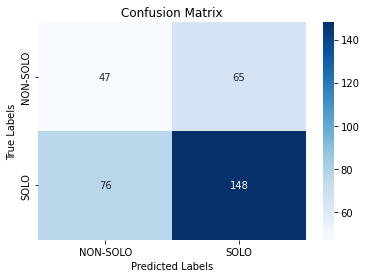

In [19]:
baseline(0)

39
Classification Report:
              precision    recall  f1-score   support

           1     0.5000    0.2768    0.3563       112
           0     0.7044    0.8616    0.7751       224

    accuracy                         0.6667       336
   macro avg     0.6022    0.5692    0.5657       336
weighted avg     0.6363    0.6667    0.6355       336



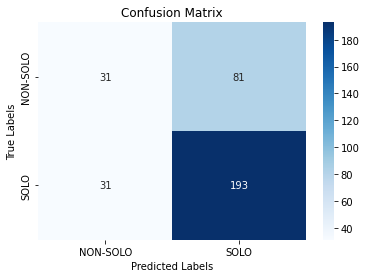

In [20]:
baseline_extra(0)

In [ ]:
# time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled_features)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

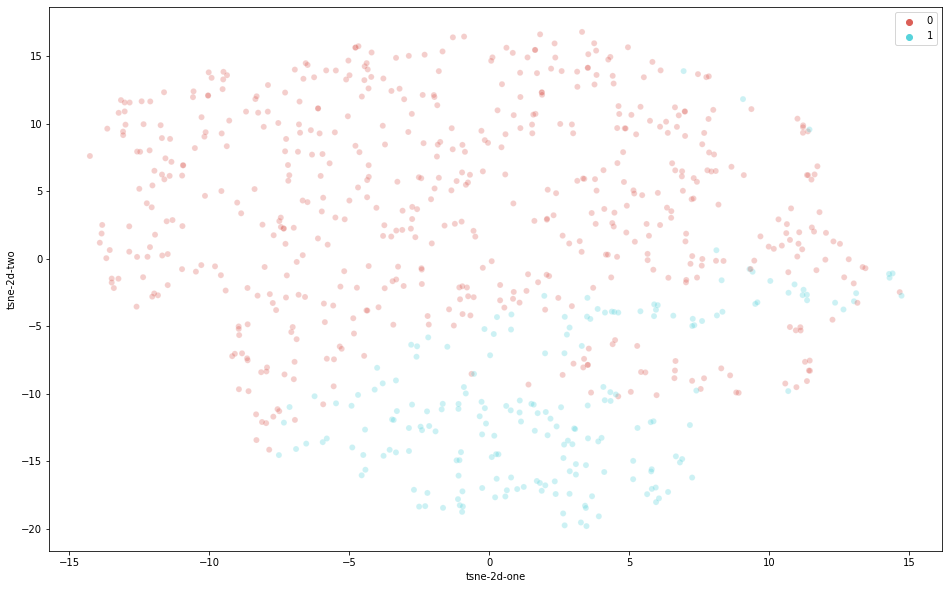

In [22]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=kmeans.labels_,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

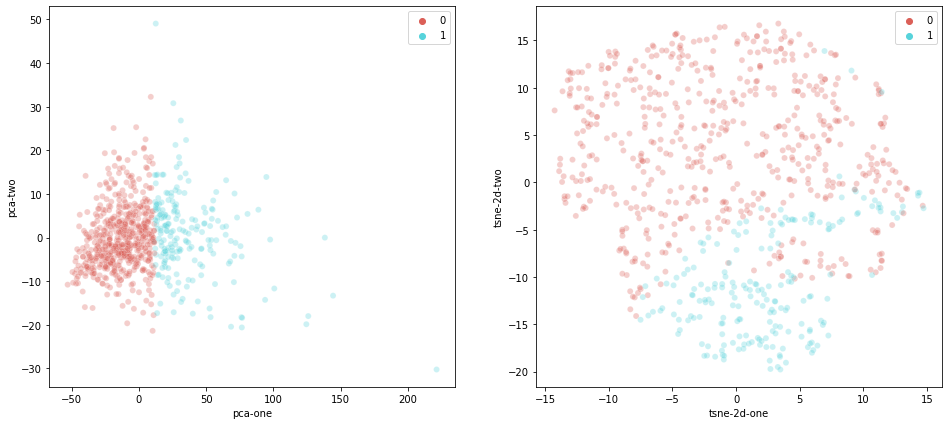

In [23]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmeans.labels_,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=kmeans.labels_,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [24]:
df_solo = pd.DataFrame(data, columns= ['solo pitch count', 'solo Delta', 'solo melody note count', 'middle_length'])
df_intro = pd.DataFrame(data, columns= ['intro pitch count', 'intro Delta', 'intro melody note count', 'intro_length'])
df_outro = pd.DataFrame(data, columns= ['outro pitch count', 'outro Delta', 'outro melody melody note count', 'outro_length'])

solo = df_solo.values
intro = df_intro.values
outro = df_outro.values
intro = shuffle(intro)
outro = shuffle(outro)
scaled_features = scaler.fit_transform(features)

In [25]:
len(solo)*.3

226.5

In [26]:
n = 377
n2 = 378


intro1, intro_subset = train_test_split(intro, test_size=377)
outro1, outro_subset = train_test_split(outro, test_size=378)

window = np.concatenate((intro_subset, outro_subset), axis=0)

dataset = np.concatenate((solo,window),axis=0)
label = [[0] if x < len(dataset)/2 else [1] for x in range(len(dataset)) ]
label = np.array(label)
random_dataset, random_label = shuffle(dataset, label)
random_scaled = scaler.fit_transform(random_dataset)
random_label1d = np.array([ random_label[i][0] for i in range(len(random_label)) ])

solo_train, solo_subset = train_test_split(solo, test_size=226)
window_train, window_subset = train_test_split(window, test_size = 226)

solo_val, solo_test = train_test_split(solo_subset, test_size=113)
window_val, window_test = train_test_split(window_subset, test_size=113)

# pca as dataset for classifier
# pca_result = pca.fit_transform(dataset)

# solo_pca, window_pca = np.array_split(pca_result, 2)

# solo_train, solo_subset = train_test_split(solo_pca, test_size=226)
# window_train, window_subset = train_test_split(window_pca, test_size = 226)

# solo_val, solo_test = train_test_split(solo_subset, test_size=113)
# window_val, window_test = train_test_split(window_subset, test_size=113)


# intro1, intro_subset = train_test_split(intro, test_size=196)
# outro1, outro_subset = train_test_split(outro, test_size=196)

# window = np.concatenate((intro_subset, outro_subset), axis=0)

# solo_train, solo_subset = train_test_split(solo, test_size=118)
# window_train, window_subset = train_test_split(window, test_size = 118)

# solo_val, solo_test = train_test_split(solo_subset, test_size=59)
# window_val, window_test = train_test_split(window_subset, test_size=59)


Explained variation per principal component: [0.86023322 0.07640108 0.05945168]


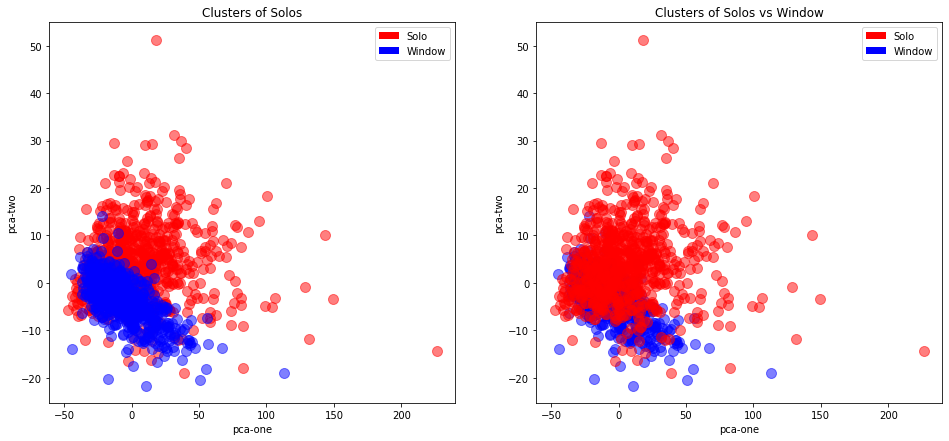

<Figure size 1152x504 with 0 Axes>

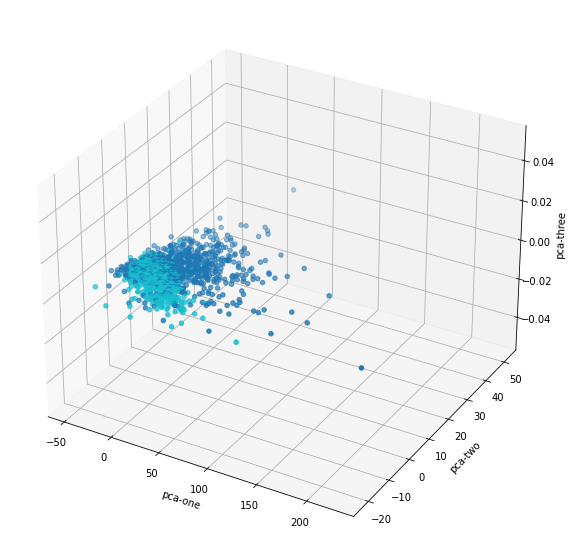

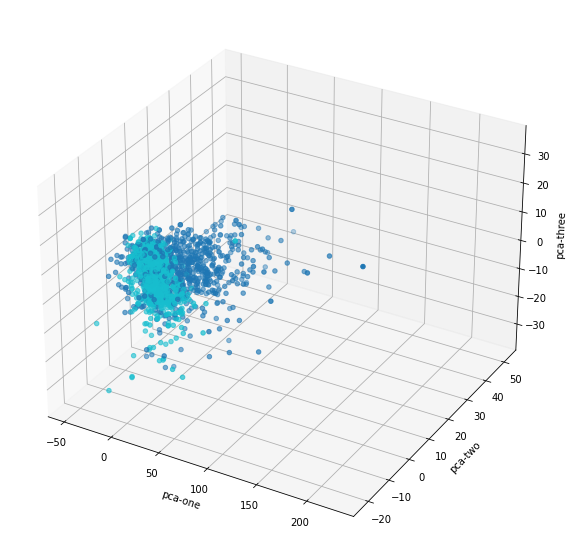

In [28]:
pca = PCA(n_components=3)

random_dataset_norm = preprocessing.normalize(random_dataset)
pca_result = pca.fit_transform(random_dataset)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

df={}
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2] 

plt.figure(figsize=(16,7))
ax = plt.subplot(1, 2, 1)
plt.scatter(pca_result[random_label1d==0, 0], pca_result[random_label1d==0, 1], s=100, c='red', label ='Cluster 1', alpha=0.5)
plt.scatter(pca_result[random_label1d==1, 0], pca_result[random_label1d==1, 1], s=100, c='blue', label ='Cluster 2', alpha=0.5)
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
classes = ['Solo','Window']
class_colours = ['r','b']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=1)
plt.title('Clusters of Solos')
plt.xlabel('pca-one')
plt.ylabel('pca-two')

ax1 = plt.subplot(1, 2, 2)
plt.scatter(pca_result[random_label1d==1, 0], pca_result[random_label1d==1, 1], s=100, c='blue', label ='Cluster 2', alpha=0.5)
plt.scatter(pca_result[random_label1d==0, 0], pca_result[random_label1d==0, 1], s=100, c='red', label ='Cluster 1', alpha=0.5)
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
classes = ['Solo','Window']
class_colours = ['r','b']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=1)
plt.title('Clusters of Solos vs Window')
plt.xlabel('pca-one')
plt.ylabel('pca-two')
plt.show()

plt.figure(figsize=(16,7))
ax3 = plt.figure(figsize=(16,10)).gca(projection='3d')
ax3.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"],
    #zs=df["pca-three"],
    c=random_label1d, 
    cmap='tab10'
)
ax3.set_xlabel('pca-one')
ax3.set_ylabel('pca-two')
ax3.set_zlabel('pca-three')


ax4 = plt.figure(figsize=(16,10)).gca(projection='3d')
ax4.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"],
    zs=df["pca-three"],
    c=random_label1d, 
    cmap='tab10'
)
ax4.set_xlabel('pca-one')
ax4.set_ylabel('pca-two')
ax4.set_zlabel('pca-three')
plt.show()


In [29]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2500)
tsne_results = tsne.fit_transform(random_dataset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1510 samples in 0.016s...
[t-SNE] Computed neighbors for 1510 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1510
[t-SNE] Computed conditional probabilities for sample 1510 / 1510
[t-SNE] Mean sigma: 3.179739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.913960
[t-SNE] KL divergence after 2500 iterations: 0.733141
t-SNE done! Time elapsed: 18.800023078918457 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

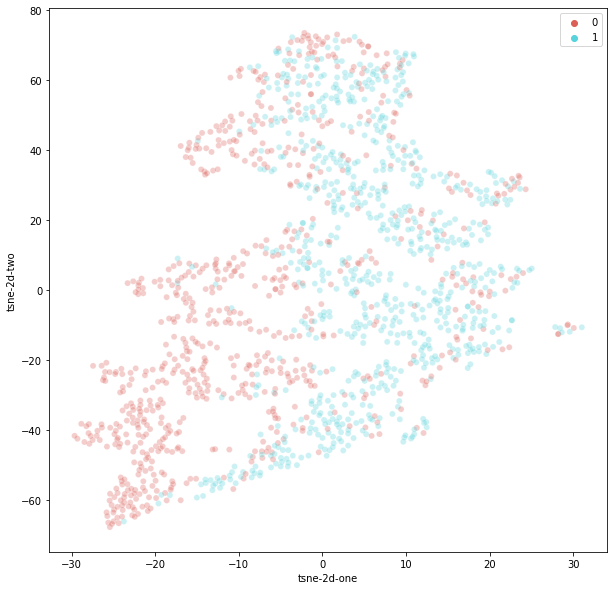

In [30]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=random_label1d,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

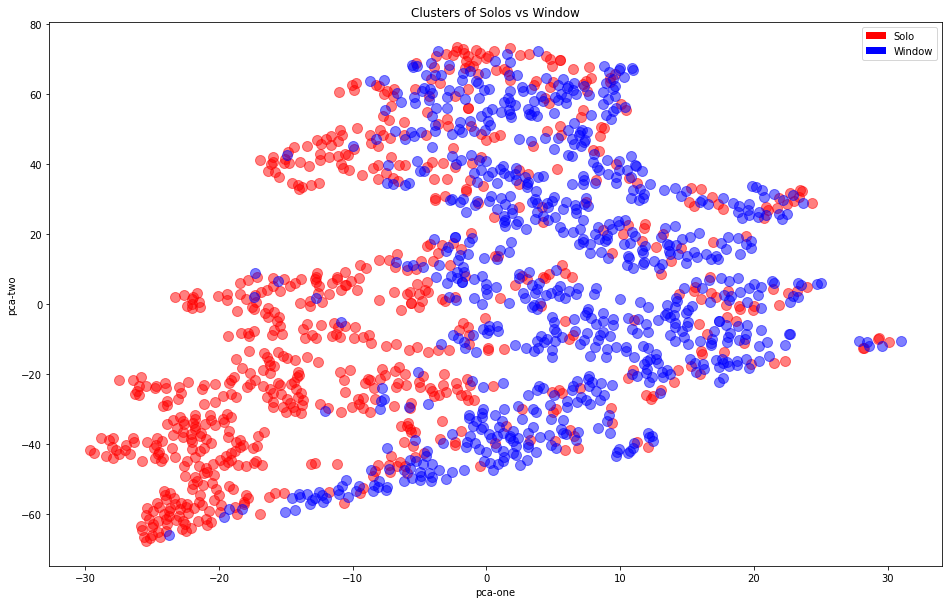

In [31]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[random_label1d==0, 0], tsne_results[random_label1d==0, 1], s=100, c='red', label ='Cluster 1', alpha=0.5)
plt.scatter(tsne_results[random_label1d==1, 0], tsne_results[random_label1d==1, 1], s=100, c='blue', label ='Cluster 2', alpha=0.5)
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
classes = ['Solo','Window']
class_colours = ['r','b']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=1)
plt.title('Clusters of Solos vs Window')
plt.xlabel('pca-one')
plt.ylabel('pca-two')
plt.show()

In [32]:
count = 0
correct = 0
for x in range(len(kmeans.labels_)):
    if kmeans.labels_[x] == 0:
        count += 1
    if x < 755 and kmeans.labels_[x] == random_label[x]:
        correct += 1
    if x > 755 and kmeans.labels_[x] == random_label[x]:
        correct += 1
        
print(count)
print(correct)
print(correct/len(kmeans.labels_))

552
373
0.49403973509933774


In [33]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

# y_onehot = nn.functional.one_hot( torch.from_numpy(random_label1d).to(torch.int64), num_classes=2)
# y_onehot = y_onehot.sum(dim=0).float()

# val_test_size = int(len(dataset)*.30)
# test_size = int(val_test_size * .50)

# trainX, valtestX = train_test_split(random_dataset_norm, test_size = val_test_size)
# trainy, valtesty = train_test_split(y_onehot, test_size=val_test_size)

# testX, valX = train_test_split(valtestX, test_size=test_size)
# testy, valy = train_test_split(valtesty, test_size=test_size)

batch_size=64

trainX = np.concatenate((solo_train, window_train), axis=0)
trainy = np.array([0 if x < len(trainX)/2 else 1 for x in range(len(trainX)) ])
trainy = nn.functional.one_hot( torch.from_numpy(trainy).to(torch.int64), num_classes=2)

valX = np.concatenate((solo_val, window_val), axis=0)
valy = np.array([0 if x < len(valX)/2 else 1 for x in range(len(valX)) ])
valy = nn.functional.one_hot( torch.from_numpy(valy).to(torch.int64), num_classes=2)
 
testX = np.concatenate((solo_test, window_test), axis=0)
testy = np.array([0 if x < len(testX)/2 else 1 for x in range(len(testX)) ])
testy = nn.functional.one_hot( torch.from_numpy(testy).to(torch.int64), num_classes=2)

trainX, trainy = shuffle(trainX, trainy)
valX, valy = shuffle(valX, valy)
testX, testy = shuffle(testX, testy)

trainset = TensorDataset( torch.from_numpy(trainX).float(), trainy )
testset = TensorDataset( torch.from_numpy(testX).float(), testy )
valset = TensorDataset( torch.from_numpy(valX).float(), valy )

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

In [34]:
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu" 
print(dev)
device = torch.device(dev)
print(device)

cuda:0
cuda:0


In [38]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        n=16
        self.linear = torch.nn.Linear(4, 64*n)
        self.linear2 = torch.nn.Linear(64*n,128*n)
        self.linear3 = torch.nn.Linear(128*n,256*n)
        self.linear4 = torch.nn.Linear(256*n,128*n)
        self.linear5 = torch.nn.Linear(128*n,64*n)
        self.linear6 = torch.nn.Linear(64*n,2)
        self.dropout = nn.Dropout(p=0.5)
    def forward(self, x):
        x = F.relu(self.linear(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        x = self.dropout(x)
        x = F.relu(self.linear3(x))
        x = self.dropout(x)
        x = F.relu(self.linear4(x))
        x = self.dropout(x)
        x = F.relu(self.linear5(x))
        y_pred = torch.sigmoid(self.linear6(x))
        return y_pred
    
class LogisticRegressionLight(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionLight, self).__init__()
        self.linear = torch.nn.Linear(5, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [39]:
model = LogisticRegression()
model.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [40]:
tensor_X = Variable(torch.from_numpy(trainX))
# tensor_y = Variable(torch.from_numpy(trainy))
from sklearn.metrics import accuracy_score
#tensor_X = trainX
tensor_y = trainy
train_accuracy = list()
val_accuracy = list()
train_loss = list()
val_loss = list()
epoch_list = list()
for epoch in range(250):
    total_correct=0
    total = 0
    for i, (x,y) in enumerate(trainloader):
        model.train()
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(x.float().to(device))
        # Compute Loss
        loss = criterion(y_pred, y.float().to(device))
        # Backward pass
        loss.backward()
        optimizer.step()
        
        y_pred_max = torch.argmax(y_pred, dim=1)
        y_max = torch.argmax(y, dim=1)

        for i in range(len(y_pred_max)):
            total+=1
            if y_pred_max[i] ==  y_max[i]:
                total_correct += 1
        accuracy = accuracy_score(y_pred_max.detach().cpu(), y_max.detach().cpu())
        # print(accuracy)
    # if epoch%10 == 0:
    epoch_list.append(epoch)
    print("Epoch: {}".format(epoch))
    #print("{}/{}: {}".format(total_correct,total,total_correct/total))
    y_pred = model(tensor_X.float().to(device))
    loss = criterion(y_pred, tensor_y.float().to(device))

    y_pred_max = torch.argmax(y_pred.detach().cpu(), dim=1)
    y_max = torch.argmax(tensor_y.detach().cpu(), dim=1)

    accuracy = accuracy_score(y_pred_max, y_max)
    print("Train Accuracy: {}, Loss: {}".format(accuracy, loss))

    train_accuracy.append(accuracy)
    train_loss.append(loss.detach().cpu())
    
    # delete for memory
    del loss, y_pred , y_pred_max
    
    test_class_correct = list(0. for i in range(2))
    test_class_total = list(0. for i in range(2))
    test_correct = 0
    test_total = 0
    for i, (test_x,test_y) in enumerate(valloader):
        test_y_pred = model(test_x.to(device))
        for j in range(len(test_x)):

            label = int(test_y[j][0])
            test_class_total[label] += 1
            test_total += 1

            test_y_max = torch.argmax(test_y.detach().cpu(), dim=1)
            test_y_pred_max = torch.argmax(test_y_pred.detach().cpu(), dim=1)

            if test_y_max[j] == test_y_pred_max[j]:
                test_class_correct[label]+=1
                test_correct += 1

    val_X = Variable(torch.from_numpy(valX)).float().to(device)
    val_y_pred = model(val_X)
    loss = criterion(val_y_pred, valy.float().to(device))
    val_loss.append(loss.detach().cpu())
#         for i in range(2):
#             if i==0:t
#                 print("Solo test accuracy: {}/{}: {}".format(test_class_correct[i],test_class_total[i],test_class_correct[i]/test_class_total[i]))
#             else:
#                 print("Non_solo test accuracy: {}/{}: {}".format(test_class_correct[i],test_class_total[i],test_class_correct[i]/test_class_total[i]))
    val_accuracy.append(test_correct/test_total)    
    print("Val Accuracy: {}/{}: {}, Val Loss: {}".format(test_correct,test_total,test_correct/test_total, loss))
    # delete for memory
    del loss
    del val_y_pred
    del test_y_pred
    del val_X
    del test_x
    del x


Epoch: 0
Train Accuracy: 0.5, Loss: 0.6846538186073303
Val Accuracy: 113/226: 0.5, Val Loss: 0.6835058927536011
Epoch: 1
Train Accuracy: 0.6039697542533081, Loss: 0.6491729617118835
Val Accuracy: 133/226: 0.588495575221239, Val Loss: 0.6598240733146667
Epoch: 2
Train Accuracy: 0.6843100189035917, Loss: 0.6170737743377686
Val Accuracy: 163/226: 0.7212389380530974, Val Loss: 0.6095433831214905
Epoch: 3
Train Accuracy: 0.6918714555765595, Loss: 0.5812717080116272
Val Accuracy: 150/226: 0.6637168141592921, Val Loss: 0.5793267488479614
Epoch: 4
Train Accuracy: 0.6559546313799622, Loss: 0.5793136358261108
Val Accuracy: 160/226: 0.7079646017699115, Val Loss: 0.5635706186294556
Epoch: 5
Train Accuracy: 0.6937618147448015, Loss: 0.5890694260597229
Val Accuracy: 162/226: 0.7168141592920354, Val Loss: 0.5601212978363037
Epoch: 6
Train Accuracy: 0.7136105860113422, Loss: 0.5480504631996155
Val Accuracy: 166/226: 0.7345132743362832, Val Loss: 0.5162566304206848
Epoch: 7
Train Accuracy: 0.7117202268

Epoch: 58
Train Accuracy: 0.7438563327032136, Loss: 0.5030195713043213
Val Accuracy: 171/226: 0.7566371681415929, Val Loss: 0.5141249299049377
Epoch: 59
Train Accuracy: 0.7646502835538752, Loss: 0.492217093706131
Val Accuracy: 175/226: 0.7743362831858407, Val Loss: 0.49754342436790466
Epoch: 60
Train Accuracy: 0.7551984877126654, Loss: 0.48431143164634705
Val Accuracy: 172/226: 0.7610619469026548, Val Loss: 0.4894634783267975
Epoch: 61
Train Accuracy: 0.7457466918714556, Loss: 0.5183224081993103
Val Accuracy: 180/226: 0.7964601769911505, Val Loss: 0.4822957515716553
Epoch: 62
Train Accuracy: 0.7589792060491494, Loss: 0.503145694732666
Val Accuracy: 178/226: 0.7876106194690266, Val Loss: 0.4912552237510681
Epoch: 63
Train Accuracy: 0.7580340264650284, Loss: 0.4996354281902313
Val Accuracy: 187/226: 0.827433628318584, Val Loss: 0.49743252992630005
Epoch: 64
Train Accuracy: 0.7599243856332704, Loss: 0.4872593581676483
Val Accuracy: 178/226: 0.7876106194690266, Val Loss: 0.4752532541751861

Val Accuracy: 186/226: 0.8230088495575221, Val Loss: 0.4765270948410034
Epoch: 116
Train Accuracy: 0.7996219281663516, Loss: 0.450583279132843
Val Accuracy: 177/226: 0.7831858407079646, Val Loss: 0.4929313659667969
Epoch: 117
Train Accuracy: 0.775992438563327, Loss: 0.468409925699234
Val Accuracy: 183/226: 0.8097345132743363, Val Loss: 0.4733584225177765
Epoch: 118
Train Accuracy: 0.779773156899811, Loss: 0.45225489139556885
Val Accuracy: 183/226: 0.8097345132743363, Val Loss: 0.4552329480648041
Epoch: 119
Train Accuracy: 0.77882797731569, Loss: 0.44710731506347656
Val Accuracy: 182/226: 0.8053097345132744, Val Loss: 0.4323149025440216
Epoch: 120
Train Accuracy: 0.8034026465028355, Loss: 0.4490496814250946
Val Accuracy: 188/226: 0.831858407079646, Val Loss: 0.4561278820037842
Epoch: 121
Train Accuracy: 0.779773156899811, Loss: 0.4640170931816101
Val Accuracy: 176/226: 0.7787610619469026, Val Loss: 0.4820854961872101
Epoch: 122
Train Accuracy: 0.7835538752362949, Loss: 0.444173216819763

Val Accuracy: 186/226: 0.8230088495575221, Val Loss: 0.45080795884132385
Epoch: 173
Train Accuracy: 0.8109640831758034, Loss: 0.4095616042613983
Val Accuracy: 189/226: 0.8362831858407079, Val Loss: 0.4384858012199402
Epoch: 174
Train Accuracy: 0.8043478260869565, Loss: 0.4123258888721466
Val Accuracy: 186/226: 0.8230088495575221, Val Loss: 0.4394473731517792
Epoch: 175
Train Accuracy: 0.8137996219281664, Loss: 0.41031789779663086
Val Accuracy: 185/226: 0.8185840707964602, Val Loss: 0.4308971166610718
Epoch: 176
Train Accuracy: 0.8166351606805293, Loss: 0.40228697657585144
Val Accuracy: 181/226: 0.8008849557522124, Val Loss: 0.4687574505805969
Epoch: 177
Train Accuracy: 0.8109640831758034, Loss: 0.4058092534542084
Val Accuracy: 189/226: 0.8362831858407079, Val Loss: 0.45701417326927185
Epoch: 178
Train Accuracy: 0.8128544423440454, Loss: 0.39825117588043213
Val Accuracy: 180/226: 0.7964601769911505, Val Loss: 0.4650155007839203
Epoch: 179
Train Accuracy: 0.8175803402646503, Loss: 0.4151

Val Accuracy: 193/226: 0.8539823008849557, Val Loss: 0.6980908513069153
Epoch: 230
Train Accuracy: 0.8128544423440454, Loss: 0.3991689383983612
Val Accuracy: 189/226: 0.8362831858407079, Val Loss: 0.46511706709861755
Epoch: 231
Train Accuracy: 0.8156899810964083, Loss: 0.40301746129989624
Val Accuracy: 191/226: 0.8451327433628318, Val Loss: 0.47879013419151306
Epoch: 232
Train Accuracy: 0.8194706994328923, Loss: 0.3924327492713928
Val Accuracy: 188/226: 0.831858407079646, Val Loss: 0.4712713062763214
Epoch: 233
Train Accuracy: 0.8185255198487713, Loss: 0.40420228242874146
Val Accuracy: 183/226: 0.8097345132743363, Val Loss: 0.4636584222316742
Epoch: 234
Train Accuracy: 0.8279773156899811, Loss: 0.38870567083358765
Val Accuracy: 189/226: 0.8362831858407079, Val Loss: 0.4131315052509308
Epoch: 235
Train Accuracy: 0.8260869565217391, Loss: 0.40554773807525635
Val Accuracy: 189/226: 0.8362831858407079, Val Loss: 0.48928162455558777
Epoch: 236
Train Accuracy: 0.8166351606805293, Loss: 0.395

In [41]:
pred = model(Variable(torch.from_numpy(trainX)).float().to(device))
pred_max = torch.argmax(pred.detach().cpu(), dim=1)
y_max = torch.argmax(trainy, dim=1)
acc = accuracy_score(pred_max,y_max)
print(acc)

0.832703213610586


In [42]:
pred = model(Variable(torch.from_numpy(testX)).float().to(device))
pred_max = torch.argmax(pred.detach().cpu(), dim=1)
y_max = torch.argmax(testy, dim=1)
acc = accuracy_score(pred_max,y_max)
print(acc)

0.8008849557522124


In [43]:
pred = model(Variable(torch.from_numpy(valX)).float().to(device))
pred_max = torch.argmax(pred.detach().cpu(), dim=1)
y_max = torch.argmax(valy, dim=1)
acc = accuracy_score(pred_max,y_max)
print(acc)

0.8185840707964602


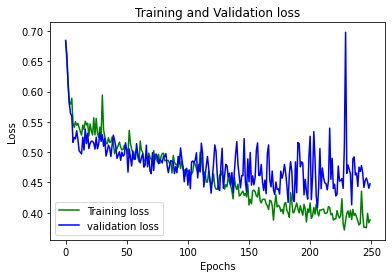

In [44]:
plt.plot(epoch_list, train_loss, 'g', label='Training loss')
plt.plot(epoch_list, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

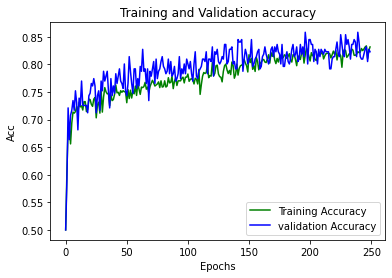

In [45]:
plt.plot(epoch_list, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epoch_list, val_accuracy, 'b', label='validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [46]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
correct = 0
total = 0
for i, (x,y) in enumerate(trainloader):
    y_pred = model(x.to(device)).detach().cpu()
    y_pred_max = torch.argmax(y_pred, dim=1)
    y_max =torch.argmax(y, dim=1)
    for j in range(len(x)):
        label = int(y[j][0])
        class_total[label] += 1
        total += 1
        if y_max[j] == y_pred_max[j]:
            class_correct[label]+=1
            correct += 1
for i in range(2):
    print("{}/{}: {}".format(class_correct[i],class_total[i],class_correct[i]/class_total[i]))
print("{}/{}: {}".format(correct,total,correct/total))

481.0/529.0: 0.9092627599243857
383.0/529.0: 0.724007561436673
864/1058: 0.8166351606805293


In [47]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
correct = 0
total = 0
for i, (x,y) in enumerate(testloader):
    y_pred = model(x.to(device)).detach().cpu()
    y_pred_max = torch.argmax(y_pred, dim=1)
    y_max =torch.argmax(y, dim=1)
    for j in range(len(x)):
        label = int(y[j][0])
        class_total[label] += 1
        total += 1
        if y_max[j] == y_pred_max[j]:
            class_correct[label]+=1
            correct += 1
for i in range(2):
    print("{}/{}: {}".format(class_correct[i],class_total[i],class_correct[i]/class_total[i]))
print("{}/{}: {}".format(correct,total,correct/total))

99.0/113.0: 0.8761061946902655
78.0/113.0: 0.6902654867256637
177/226: 0.7831858407079646


In [48]:
total_correct=0
for x in range(len(y_pred_test)):
    if torch.round(y_pred_test[x]) == tensor_y_test[x]:
        total_correct += 1
print("{}/{}: {}".format(total_correct,len(y_pred_test),total_correct/len(y_pred_test)))

NameError: name 'y_pred_test' is not defined

In [ ]:
total_correct=0
for x in range(len(y_pred)):
    if torch.round(y_pred[x]) == tensor_y[x]:
        total_correct += 1
print("{}/{}: {}".format(total_correct, len(y_pred),total_correct/len(y_pred)))